In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [5]:
df = pd.read_csv("final_features.csv",index_col=0)
df.head()

,id,is_duplicate,q1len,q2len,q1freq,q2freq,q1_n_words,q2_n_words,common_words,word_total,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,0,0,66,57,1,1,14,12,10.0,23,...,-17.747144,7.232094,1.578580,-7.447540,0.360983,-11.833308,-11.249363,1.852297,3.630329,11.942385
1,1,0,51,88,4,1,8,13,4.0,20,...,22.829408,3.333261,-5.066854,6.977669,33.760693,6.037682,-27.214980,13.087034,-4.928176,33.398721
2,2,0,73,59,1,1,14,10,4.0,24,...,-23.373241,-1.190748,11.905931,9.456080,10.872678,1.089150,6.161524,0.310342,-12.054247,26.727977
3,3,0,50,65,1,1,11,9,0.0,19,...,13.241865,-3.984300,-11.721567,12.137801,-9.194564,-21.156084,-7.106075,-19.471916,2.163286,2.875710
4,4,0,76,39,3,1,13,7,2.0,20,...,-10.251953,-8.424718,-14.437992,-12.661327,-4.409586,12.534569,-11.637611,-16.320942,3.557839,-9.794110


In [6]:
df.shape

(404287, 628)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404286
Columns: 628 entries, id to 299_y
dtypes: float64(613), int64(15)
memory usage: 1.9 GB


In [8]:
sample_df = df.sample(n = 50000)
sample_df.shape

(50000, 628)

<h2>Applying ML algorithms</h2>

In [9]:
y = sample_df['is_duplicate']
X = sample_df
X = X.drop('is_duplicate',axis =1)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
pos = len(y_train == 1)
neg= len(y_train == 0)
print(pos,neg)

40000 40000


In [22]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [15]:
def applyDecisionTree(X_train,y_train):
    DT_clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=42)
    DT_clf.fit(X_train,y_train)
    DTC_predictions = DT_clf.predict(X_test)
    return DTC_predictions

In [16]:
def applyLogisticRegression(X_train,y_train):
    lg=LogisticRegression(C=1, penalty='l2', solver='liblinear')
    lg.fit(X_train, y_train)
    lg_predictions = lg.predict(X_test)
    return lg_predictions

In [17]:
def applySVM(X_train,y_train):
    svm_classifier = svm.LinearSVC(loss='hinge', penalty='l2', tol=0.1, C=50)
    svm_classifier.fit(X_train,y_train)
    svm_predictions = svm_classifier.predict(X_test)
    return svm_predictions

In [18]:
def applyKNN(X_train,y_train):
    knn_classifier = KNeighborsClassifier(n_neighbors = 8)
    knn_classifier.fit(X_train, y_train)
    knn_predictions = knn_classifier.predict(X_test)
    return knn_predictions

In [19]:
def applyRandomForest(X_train,y_train):
    rf_model = RandomForestClassifier(n_estimators = 10)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    return rf_predictions

Decision tree accuracy :  0.7578


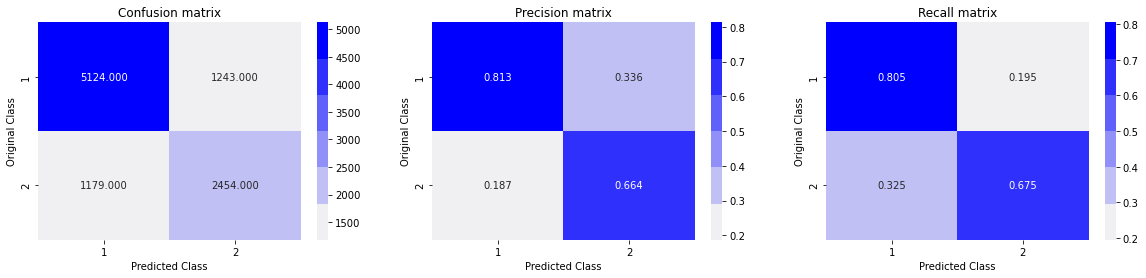

In [20]:
DTC_predictions = applyDecisionTree(X_train,y_train)
print("Decision tree accuracy : ", accuracy_score(y_test,DTC_predictions))
print("=========================================================================")
plot_confusion_matrix(y_test, DTC_predictions)

Logistic regression accuracy :  0.7349


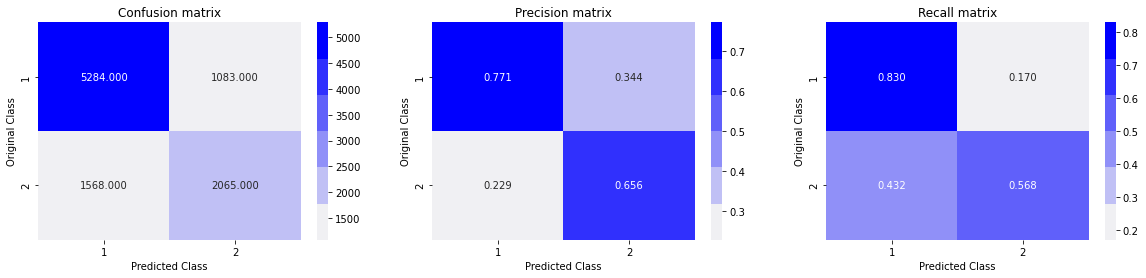

In [21]:
lg_predictions = applyLogisticRegression(X_train,y_train)
print("Logistic regression accuracy : ", accuracy_score(y_test,lg_predictions))
print("=========================================================================")
plot_confusion_matrix(y_test, lg_predictions)

SVM accuracy :  0.663


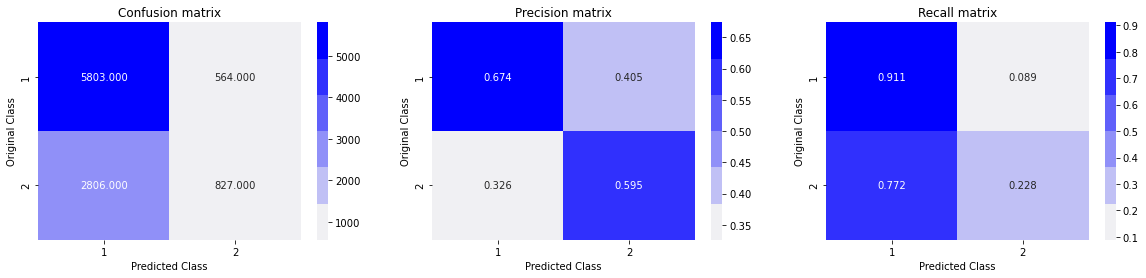

In [22]:
svm_predictions = applySVM(X_train,y_train)
print("SVM accuracy : ", accuracy_score(y_test,svm_predictions))
print("=========================================================================")
plot_confusion_matrix(y_test, svm_predictions)

KNN accuracy :  0.5704


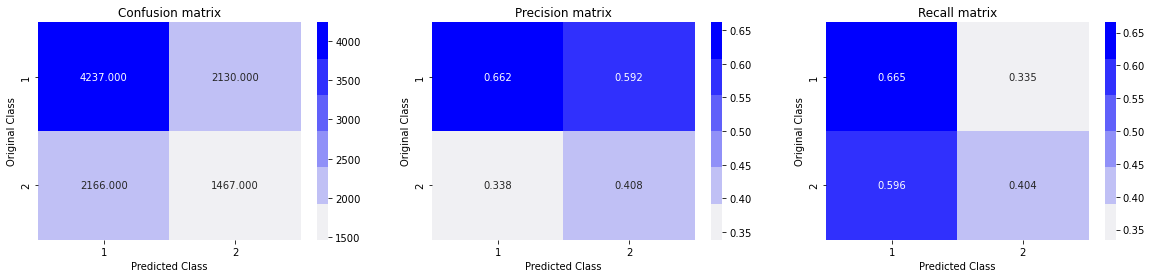

In [24]:

knn_predictions = applyKNN(X_train,y_train)
print("KNN accuracy : ", accuracy_score(y_test,knn_predictions))
print("=========================================================================")
plot_confusion_matrix(y_test, knn_predictions)

Random Forest accuracy :  0.7776


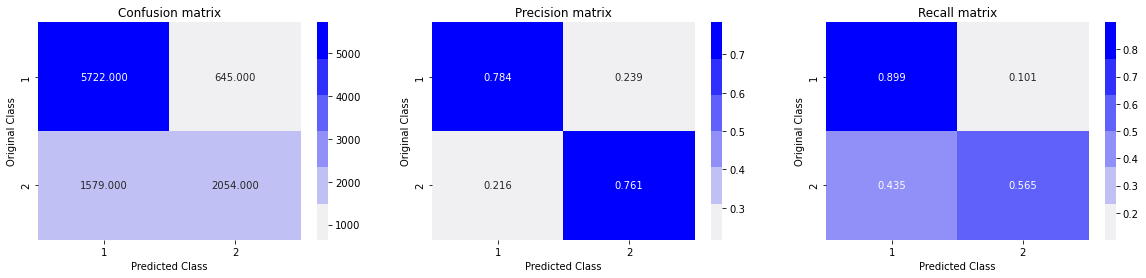

In [25]:

rf_predictions = applyRandomForest(X_train,y_train)
print("Random Forest accuracy : ", accuracy_score(y_test,rf_predictions))
print("=========================================================================")
plot_confusion_matrix(y_test, rf_predictions)

<h4> Since Logistic Regression and Random forest gave better results, plotting ROC, AUC curve for these two</h4>

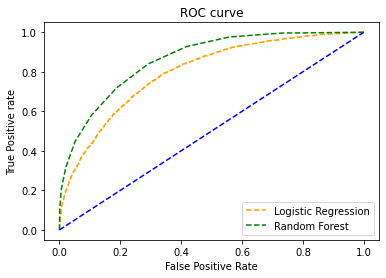

In [26]:
lg_model=LogisticRegression(C=1, penalty='l2', solver='liblinear')
lg_model.fit(X_train, y_train)
pred_prob1 = lg_model.predict_proba(X_test)

rf_model = RandomForestClassifier(n_estimators = 10)
rf_model.fit(X_train, y_train)
pred_prob2 = rf_model.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=3000)
plt.show();

<h4> Apply GridsearchCV for Logistic Regression as well as Random forest </h4>

In [29]:
param_grid_RF = {"n_estimators" : np.arange(50,200,25)}
                          
param_grid_LG = {'C': [0.1, 1, 10, 100, 1000], 
              'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [30]:
grid1 = GridSearchCV(RandomForestClassifier(),param_grid_RF)
grid1.fit(X_train,y_train)
rf_grid_predictions = grid1.predict(X_test)
cv_rf_accuracy = accuracy_score(y_test, rf_grid_predictions)

In [31]:
grid2 = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_LG)
grid2.fit(X_train,y_train)
lg_grid_predictions = grid2.predict(X_test)
cv_lg_accuracy = accuracy_score(y_test, lg_grid_predictions)

Random Forest, GRIDSEARCHCV: Best hyperparameters = {'n_estimators': 175}
Random Forest accuracy with best hyperparameters = 0.8185


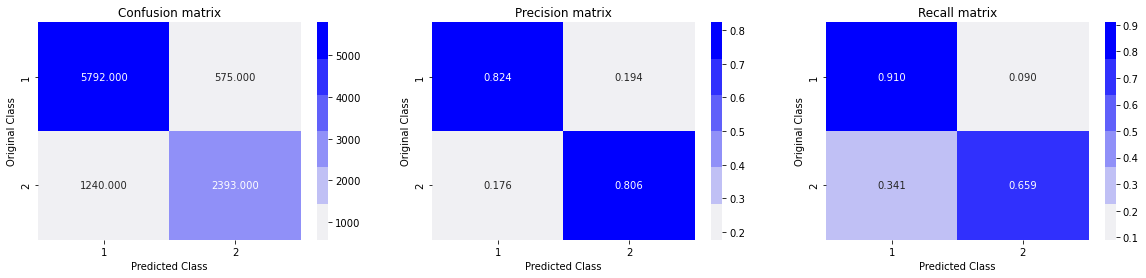

LOGISTIC REGRESSION, GRIDSEARCHCV: Best hyperparameters = {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Logistic Regression accuracy with best hyperparameters = 0.8069


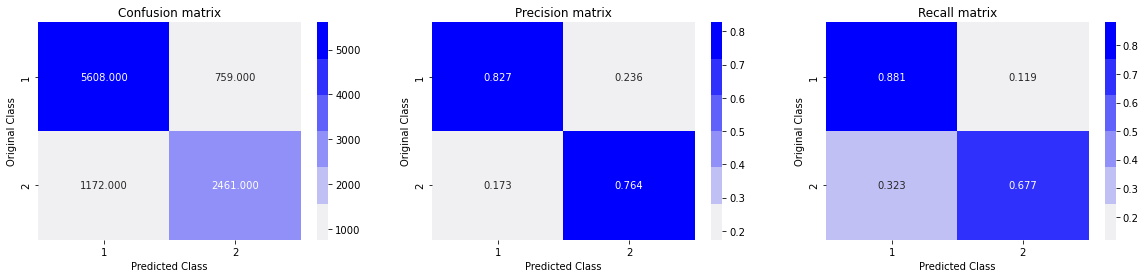

In [32]:
print("Random Forest, GRIDSEARCHCV: Best hyperparameters =", grid1.best_params_)
print("Random Forest accuracy with best hyperparameters =", cv_rf_accuracy)
plot_confusion_matrix(y_test, rf_grid_predictions)
print("=========================================================================")

print("LOGISTIC REGRESSION, GRIDSEARCHCV: Best hyperparameters =", grid2.best_params_)
print("Logistic Regression accuracy with best hyperparameters =", cv_lg_accuracy)
plot_confusion_matrix(y_test, lg_grid_predictions)


<h4>We can notice there is significant increase in accuracy after hyperparameter tuning. </h4>

<h2> Applying gradient Boosting</h2>

In [43]:
#Choose all predictors except target & IDcols
#predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 80}, 0.9097584212725826)

In [13]:
clf = GradientBoostingClassifier(n_estimators=80)
clf.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=80)

In [20]:
gb_predictions = clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, clf_predictions)

Gradient Boosting accuracy with best hyperparameters = 0.8224


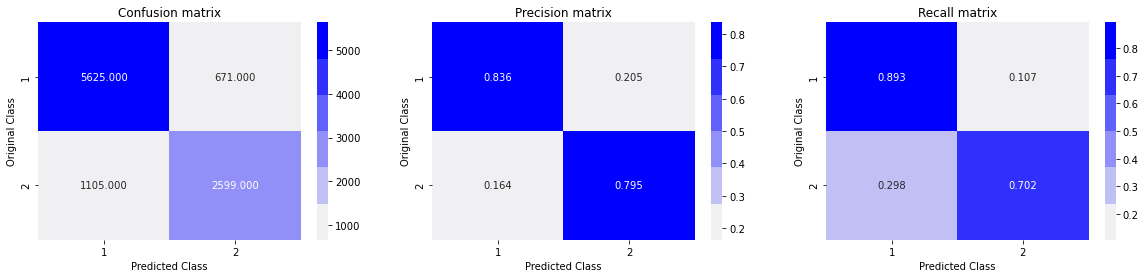

In [23]:
print("Gradient Boosting accuracy with best hyperparameters =", gb_accuracy)
plot_confusion_matrix(y_test, gb_predictions)